Hi Max! hope all is well. 
## slight disclaimer, this notebook is no where near ready!
I just need some advise as to what model to use. I have tried various methods over the past couple of weeks, each with no luck so I’m stumped. when i try to use a classification model I receive the error "valueerror unknown label type 'continuous' " which is self explanatory which is why i began to explore other models. up till now i have tried to use a regression approach but i still receive an error and i feel as though classification is still the best way to go. 

initially i wanted to use a classifier model given that i want this model to classify loan applicants as "approved" or "refused" but as i said before, i feel like I’ve hit a wall. i left this notebook with half constructed models so that you can see what I’ve been trying.

### Capstone project two: Modeling

### 1. import data and packages

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.cluster
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#data is normalized and indludes dummy variables 
refused = pd.read_csv('scaled_refused.csv')
approved = pd.read_csv('scaled_approved.csv')

in the prior notebooks, i cleaned the data and figured separating the approved and rejected applications into their own separate data frames would be the most appropriate approach however, I’m now realizing that may not have been the best because well, what is there to classify if its already classified right? i digress. the following few cells are my atempt in creating a viable model. 

In [8]:
display(refused)

,Unnamed: 0,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,...,NAME_YIELD_GROUP_high,NAME_YIELD_GROUP_low_action,NAME_YIELD_GROUP_low_normal,NAME_YIELD_GROUP_middle,PRODUCT_COMBINATION_Cash Street: high,PRODUCT_COMBINATION_Cash Street: low,PRODUCT_COMBINATION_Cash Street: middle,PRODUCT_COMBINATION_Cash X-Sell: high,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle
0,0,-0.319651,-0.742508,0.242747,-0.410996,-0.384297,-0.410996,-0.543734,-0.070311,-0.607516,...,1.585864,-0.352845,-0.721078,-0.596911,1.587675,-0.906995,-0.595862,-0.021555,-0.038174,-0.026107
1,1,-1.477783,-0.770413,-1.239463,-0.927122,-0.958903,-0.927122,-0.123629,-0.015688,-0.936266,...,1.585864,-0.352845,-0.721078,-0.596911,1.587675,-0.906995,-0.595862,-0.021555,-0.038174,-0.026107
2,2,0.054955,0.272897,-0.912574,-0.609506,-0.602253,-0.609506,1.094035,-0.070311,0.049986,...,-0.630571,-0.352845,1.386813,-0.596911,-0.629852,1.102542,-0.595862,-0.021555,-0.038174,-0.026107
3,3,-0.144906,0.735526,0.712642,0.716542,0.681167,0.716542,0.673930,-0.070311,0.049986,...,-0.630571,-0.352845,1.386813,-0.596911,-0.629852,1.102542,-0.595862,-0.021555,-0.038174,-0.026107
4,4,1.593304,-1.344806,-0.877105,-0.601565,-0.549336,-0.601565,1.051385,-0.070311,0.049986,...,-0.630571,2.834106,-0.721078,-0.596911,-0.629852,1.102542,-0.595862,-0.021555,-0.038174,-0.026107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32294,32294,-1.129077,-0.808447,0.564204,0.581555,0.419350,0.581555,0.356186,-0.070311,0.707487,...,-0.630571,-0.352845,-0.721078,1.675291,-0.629852,-0.906995,1.678242,-0.021555,-0.038174,-0.026107
32295,32295,0.963714,0.318858,1.032832,0.740363,0.751535,0.740363,0.130140,-0.070311,0.707487,...,-0.630571,-0.352845,-0.721078,1.675291,-0.629852,-0.906995,1.678242,-0.021555,-0.038174,-0.026107
32296,32296,-0.792875,0.019291,-0.488317,-0.617446,-0.622780,-0.617446,0.354053,-0.070311,-0.278765,...,1.585864,-0.352845,-0.721078,-0.596911,1.587675,-0.906995,-0.595862,-0.021555,-0.038174,-0.026107
32297,32297,0.422203,0.643788,-0.338718,-0.530102,-0.530486,-0.530102,0.164260,-0.070311,0.049986,...,1.585864,-0.352845,-0.721078,-0.596911,1.587675,-0.906995,-0.595862,-0.021555,-0.038174,-0.026107


In [9]:
display(approved)

,Unnamed: 0,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,...,NAME_YIELD_GROUP_high,NAME_YIELD_GROUP_low_action,NAME_YIELD_GROUP_low_normal,NAME_YIELD_GROUP_middle,PRODUCT_COMBINATION_Cash Street: high,PRODUCT_COMBINATION_Cash Street: low,PRODUCT_COMBINATION_Cash Street: middle,PRODUCT_COMBINATION_Cash X-Sell: high,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle
0,0,-0.977879,-0.769959,0.003715,0.002835,-0.036604,0.002835,0.140433,-0.084992,-0.349348,...,-1.134263,-0.164882,2.313132,-0.582596,-1.122167,-0.455114,-0.558035,-0.07288,8.944719,-0.127309
1,1,1.424655,-1.115503,-0.886097,-0.758514,-0.763827,-0.758514,-0.015795,-0.084992,-0.769454,...,0.881630,-0.164882,-0.432314,-0.582596,0.891133,-0.455114,-0.558035,-0.07288,-0.111798,-0.127309
2,2,0.014667,0.836047,-1.149284,-0.827728,-0.861484,-0.827728,0.435743,-0.053667,-0.769454,...,0.881630,-0.164882,-0.432314,-0.582596,0.891133,-0.455114,-0.558035,-0.07288,-0.111798,-0.127309
3,3,1.355032,-0.575670,-0.004996,-0.260177,-0.314718,-0.260177,-0.309200,-0.084992,-0.769454,...,-1.134263,-0.164882,2.313132,-0.582596,-1.122167,-0.455114,-0.558035,-0.07288,8.944719,-0.127309
4,4,0.234421,0.982340,-0.298508,-0.689301,-0.734624,-0.689301,0.279515,0.278378,-1.189560,...,0.881630,-0.164882,-0.432314,-0.582596,0.891133,-0.455114,-0.558035,-0.07288,-0.111798,-0.127309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20247,20247,0.689916,-0.500579,0.460492,-0.550874,-0.567981,-0.550874,0.005162,-0.059932,-1.189560,...,0.881630,-0.164882,-0.432314,-0.582596,0.891133,-0.455114,-0.558035,-0.07288,-0.111798,-0.127309
20248,20248,0.416321,0.843901,0.419916,0.418116,0.389099,0.418116,0.761537,-0.084992,0.070757,...,-1.134263,-0.164882,-0.432314,1.716456,-1.122167,-0.455114,1.792002,-0.07288,-0.111798,-0.127309
20249,20249,-0.662391,0.610418,-0.581148,-0.343233,-0.425848,-0.343233,0.186159,-0.084992,0.490863,...,0.881630,-0.164882,-0.432314,-0.582596,0.891133,-0.455114,-0.558035,-0.07288,-0.111798,-0.127309
20250,20250,1.562237,0.163260,0.150470,0.072048,0.086602,0.072048,0.487184,-0.084992,0.910969,...,0.881630,-0.164882,-0.432314,-0.582596,0.891133,-0.455114,-0.558035,-0.07288,-0.111798,-0.127309


### 2. split data into training/testing sets 

up to this point, i have had two different data frames to work with. one DF with approved appplicates and the next with refused applications hence 2 cells calling the train_test_split function. For troubleshooting purposes, I have only moved forward with the approved data. once thats working properly ill go back and do the same with the refused data. 

In [10]:
#approved DF
x = approved['AMT_APPLICATION'] #choosing x-values
y = approved['AMT_APPLICATION']#choosing y-values
#the 'a' indicates these x's and y's are for the approved DF
Xa_train, Xa_test, ya_train, ya_test = train_test_split(x, y, test_size = 0.25, random_state = 125)

In [11]:
#refused DF
x = refused['AMT_APPLICATION'] #choosing x-values
y = refused['AMT_APPLICATION']#choosing y-values
Xr_train, Xr_test, yr_train, yr_test = train_test_split(x, y, test_size = 0.25, random_state = 125)

I was receiving an error due to the sape of the resulting train/test data created above so my solution to that is the cell below, where i convert it to an array and they bound it to the sape between -1 and 1

In [12]:
Xa_train = np.asarray(Xa_train)
Xa_test = np.asarray(Xa_test)
ya_train = np.asarray(ya_train)
Xa_train = Xa_train.reshape(-1,1)
Xa_test = Xa_test.reshape(-1,1)
ya_train = ya_train.reshape(-1,1)

In [13]:
#standardizing the data inorder to impliment a classification model
from sklearn.preprocessing import StandardScaler
y = approved['AMT_APPLICATION'].values
xa = approved[[i for i in approved.columns if i != 'AMT_APPLICATION']].values
scale = StandardScaler().fit(Xa_train)
Xa_train = scale.transform(Xa_train)
Xa_test = scale.transform(Xa_test)
xa = scale.transform(xa)

In [14]:
#checking results of a logistic regression. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(Xa_train, ya_train.astype('int'))
print(accuracy_score(clf.predict(Xa_test), ya_test.astype('int')))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9936796365791033


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


attempted a <br>
## k neighbor regressor<br>
approach. 

In [15]:
from sklearn.neighbors import KNeighborsRegressor


test_scores = []
train_scores = []

for i in range(1,20):

    knn = KNeighborsRegressor(i)
    knn.fit(Xa_train, ya_train)
    
    train_scores.append(knn.score(Xa_train,ya_train))
    test_scores.append(knn.score(Xa_test,ya_test))

In [16]:
for i in range(1,20):
    print('{0} train score is :{1:0.3f} and test score is :{2:0.3f}'.format(i, train_scores[i-1], test_scores[i-1]))

1 train score is :1.000 and test score is :1.000
2 train score is :1.000 and test score is :1.000
3 train score is :1.000 and test score is :1.000
4 train score is :1.000 and test score is :1.000
5 train score is :1.000 and test score is :1.000
6 train score is :1.000 and test score is :1.000
7 train score is :1.000 and test score is :1.000
8 train score is :1.000 and test score is :1.000
9 train score is :1.000 and test score is :1.000
10 train score is :1.000 and test score is :1.000
11 train score is :0.999 and test score is :1.000
12 train score is :0.999 and test score is :1.000
13 train score is :0.999 and test score is :1.000
14 train score is :0.999 and test score is :1.000
15 train score is :0.999 and test score is :1.000
16 train score is :0.999 and test score is :1.000
17 train score is :0.999 and test score is :1.000
18 train score is :0.999 and test score is :0.999
19 train score is :0.999 and test score is :0.999


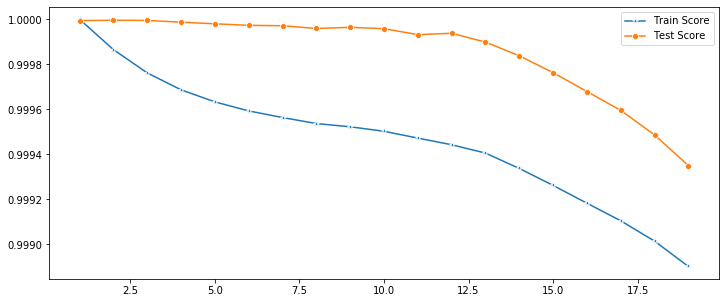

In [17]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')

K-Means Clustering: Elbow sum-of-Squares method

Text(0, 0.5, 'sum of squares')

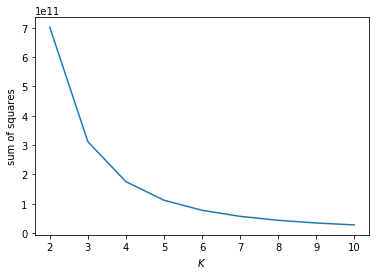

In [18]:
s = []
assignmentsR = {}
Xr = refused.to_numpy()
Krange = list(range(2,11))
for k in Krange:
    model = sklearn.cluster.KMeans(n_clusters=k)
    assigned_cluster = model.fit_predict(Xr)
    centers = model.cluster_centers_
    s.append(np.sum((Xr - centers[assigned_cluster])**2))
    assignmentsR[str(k)] = assigned_cluster
    
plt.plot(Krange,s)
plt.xlabel('$K$')
plt.ylabel('sum of squares')

i found the k neighbor regressor approach to be inconclusive. 